In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
import warnings

# Load the training features dataset
train_features = pd.read_csv('dengue_features_train.csv')

# Load the training labels dataset
train_labels = pd.read_csv('dengue_labels_train.csv')

# Load the test features dataset
test_features = pd.read_csv('dengue_features_test.csv')

# Load the submission dataset
test_submission = pd.read_csv('submission_format.csv')

# Removing limits on the number of columns
pd.set_option('display.max_columns', None)

#Removing warnings
warnings.filterwarnings("ignore", category=FutureWarning)


In [2]:
print(train_features.shape,train_labels.shape, test_features.shape)

(1456, 24) (1456, 4) (416, 24)


In [3]:
# Display the first few rows of the train_features dataset
train_features.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,292.414286,299.8,295.9,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,298.442857,293.951429,300.9,296.4,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,298.878571,295.434286,300.5,297.3,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,299.228571,295.310000,301.4,297.0,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,299.664286,295.821429,301.9,297.5,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8


In [4]:
# Display the first few rows of the train_labels dataset
train_labels.head()

,city,year,weekofyear,total_cases
0,sj,1990,18,4
1,sj,1990,19,5
2,sj,1990,20,4
3,sj,1990,21,3
4,sj,1990,22,6


In [5]:
# Display the first few rows of the test_features dataset
test_features.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,2008,18,2008-04-29,-0.0189,-0.018900,0.102729,0.091200,78.60,298.492857,298.550000,294.527143,301.1,296.4,25.37,78.781429,78.60,15.918571,3.128571,26.528571,7.057143,33.3,21.7,75.2
1,sj,2008,19,2008-05-06,-0.0180,-0.012400,0.082043,0.072314,12.56,298.475714,298.557143,294.395714,300.8,296.7,21.83,78.230000,12.56,15.791429,2.571429,26.071429,5.557143,30.0,22.2,34.3
2,sj,2008,20,2008-05-13,-0.0015,NaN,0.151083,0.091529,3.66,299.455714,299.357143,295.308571,302.2,296.4,4.12,78.270000,3.66,16.674286,4.428571,27.928571,7.785714,32.8,22.8,3.0
3,sj,2008,21,2008-05-20,NaN,-0.019867,0.124329,0.125686,0.00,299.690000,299.728571,294.402857,303.0,296.9,2.20,73.015714,0.00,15.775714,4.342857,28.057143,6.271429,33.3,24.4,0.3
4,sj,2008,22,2008-05-27,0.0568,0.039833,0.062267,0.075914,0.76,299.780000,299.671429,294.760000,302.3,297.3,4.36,74.084286,0.76,16.137143,3.542857,27.614286,7.085714,33.3,23.3,84.1


In [6]:
#Cleaning the train_feature dataset
missing_data = train_features.isnull().sum()
missing_columns = missing_data[missing_data > 0].sort_values(ascending=False)

missing_columns


ndvi_ne                                  194
ndvi_nw                                   52
station_diur_temp_rng_c                   43
station_avg_temp_c                        43
station_precip_mm                         22
ndvi_sw                                   22
ndvi_se                                   22
station_max_temp_c                        20
station_min_temp_c                        14
precipitation_amt_mm                      13
reanalysis_sat_precip_amt_mm              13
reanalysis_air_temp_k                     10
reanalysis_avg_temp_k                     10
reanalysis_dew_point_temp_k               10
reanalysis_max_air_temp_k                 10
reanalysis_min_air_temp_k                 10
reanalysis_relative_humidity_percent      10
reanalysis_specific_humidity_g_per_kg     10
reanalysis_tdtr_k                         10
reanalysis_precip_amt_kg_per_m2           10
dtype: int64

In [7]:
#Before deciding on imputation strategies, 
#let's also check for missing values in the test_features dataset to ensure consistency in our approach across both datasets
missing_data = test_features.isnull().sum()
missing_columns = missing_data[missing_data > 0].sort_values(ascending=False)

missing_columns


ndvi_ne                                  43
station_diur_temp_rng_c                  12
station_avg_temp_c                       12
ndvi_nw                                  11
station_min_temp_c                        9
station_precip_mm                         5
station_max_temp_c                        3
reanalysis_avg_temp_k                     2
reanalysis_dew_point_temp_k               2
reanalysis_max_air_temp_k                 2
reanalysis_min_air_temp_k                 2
reanalysis_air_temp_k                     2
reanalysis_relative_humidity_percent      2
reanalysis_sat_precip_amt_mm              2
reanalysis_specific_humidity_g_per_kg     2
reanalysis_tdtr_k                         2
precipitation_amt_mm                      2
reanalysis_precip_amt_kg_per_m2           2
ndvi_sw                                   1
ndvi_se                                   1
dtype: int64

In [8]:
# Dividing the columns into both numerical and categorical

# Identify columns with missing values in train_features
missing_data_train = train_features.isnull().sum()
missing_columns_train = missing_data_train[missing_data_train > 0].index

# Categorize the missing columns into numerical and categorical types
numerical_columns = [col for col in missing_columns_train if train_features[col].dtype in ['int64', 'float64']]
categorical_columns = [col for col in missing_columns_train if train_features[col].dtype == 'object']

numerical_columns, categorical_columns

(['ndvi_ne',
  'ndvi_nw',
  'ndvi_se',
  'ndvi_sw',
  'precipitation_amt_mm',
  'reanalysis_air_temp_k',
  'reanalysis_avg_temp_k',
  'reanalysis_dew_point_temp_k',
  'reanalysis_max_air_temp_k',
  'reanalysis_min_air_temp_k',
  'reanalysis_precip_amt_kg_per_m2',
  'reanalysis_relative_humidity_percent',
  'reanalysis_sat_precip_amt_mm',
  'reanalysis_specific_humidity_g_per_kg',
  'reanalysis_tdtr_k',
  'station_avg_temp_c',
  'station_diur_temp_rng_c',
  'station_max_temp_c',
  'station_min_temp_c',
  'station_precip_mm'],
 [])

In [9]:
# Dividing the columns into both numerical and categorical

# Identify columns with missing values in train_features
missing_data_test = test_features.isnull().sum()
missing_columns_test = missing_data_train[missing_data_train > 0].index

# Categorize the missing columns into numerical and categorical types
numerical_columns = [col for col in missing_columns_train if test_features[col].dtype in ['int64', 'float64']]
categorical_columns = [col for col in missing_columns_train if test_features[col].dtype == 'object']

numerical_columns, categorical_columns

(['ndvi_ne',
  'ndvi_nw',
  'ndvi_se',
  'ndvi_sw',
  'precipitation_amt_mm',
  'reanalysis_air_temp_k',
  'reanalysis_avg_temp_k',
  'reanalysis_dew_point_temp_k',
  'reanalysis_max_air_temp_k',
  'reanalysis_min_air_temp_k',
  'reanalysis_precip_amt_kg_per_m2',
  'reanalysis_relative_humidity_percent',
  'reanalysis_sat_precip_amt_mm',
  'reanalysis_specific_humidity_g_per_kg',
  'reanalysis_tdtr_k',
  'station_avg_temp_c',
  'station_diur_temp_rng_c',
  'station_max_temp_c',
  'station_min_temp_c',
  'station_precip_mm'],
 [])

In [10]:
#We don't have any categorical values. We shall proceed with imputation strategies for the numerical columns

#1. We shall interpolate ndvi columns:
ndvi_columns = ['ndvi_ne', 'ndvi_nw', 'ndvi_se', 'ndvi_sw']
train_features[ndvi_columns] = train_features[ndvi_columns].interpolate()

#2. We shall impute the temperature and humidity-related columns using the median
temp_humidity_cols = ['station_avg_temp_c', 'reanalysis_air_temp_k', 'reanalysis_avg_temp_k',
                          'reanalysis_dew_point_temp_k', 'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k',
                          'reanalysis_relative_humidity_percent', 'station_max_temp_c', 'station_min_temp_c',
                          'station_diur_temp_rng_c', 'reanalysis_tdtr_k', 'reanalysis_specific_humidity_g_per_kg']
for col in temp_humidity_cols:
    median_value = train_features[col].median()
    train_features[col].fillna(median_value, inplace=True)

#3.Fill missing values in precipitation columns with 0:
precipitation_cols = ['station_precip_mm', 'reanalysis_sat_precip_amt_mm', 'reanalysis_precip_amt_kg_per_m2','precipitation_amt_mm']
train_features[precipitation_cols] = train_features[precipitation_cols].fillna(0)

#4. Checking if we have any missing values now:
missing_after_imputation = train_features.isnull().sum().sum()
print(missing_after_imputation)


0


In [11]:
#We don't have any categorical values. We shall proceed with imputation strategies for the numerical columns

#1. We shall interpolate ndvi columns:
ndvi_columns = ['ndvi_ne', 'ndvi_nw', 'ndvi_se', 'ndvi_sw']
test_features[ndvi_columns] = test_features[ndvi_columns].interpolate()

#2. We shall impute the temperature and humidity-related columns using the median
temp_humidity_cols = ['station_avg_temp_c', 'reanalysis_air_temp_k', 'reanalysis_avg_temp_k',
                          'reanalysis_dew_point_temp_k', 'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k',
                          'reanalysis_relative_humidity_percent', 'station_max_temp_c', 'station_min_temp_c',
                          'station_diur_temp_rng_c', 'reanalysis_tdtr_k', 'reanalysis_specific_humidity_g_per_kg']
for col in temp_humidity_cols:
    median_value = test_features[col].median()
    test_features[col].fillna(median_value, inplace=True)

#3.Fill missing values in precipitation columns with 0:
precipitation_cols = ['station_precip_mm', 'reanalysis_sat_precip_amt_mm', 'reanalysis_precip_amt_kg_per_m2','precipitation_amt_mm']
test_features[precipitation_cols] = test_features[precipitation_cols].fillna(0)

#4. Checking if we have any missing values now:
missing_after_imputation = test_features.isnull().sum().sum()
print(missing_after_imputation)

0


In [12]:
# As we are now done with missing values.Let's merge train_features with train_labels on ['city', 'year', 'weekofyear']
train_data = pd.merge(train_features, train_labels, on=['city', 'year', 'weekofyear'])

# Check the first few rows of the merged dataset
train_data.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,292.414286,299.8,295.9,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,298.442857,293.951429,300.9,296.4,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,298.878571,295.434286,300.5,297.3,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,299.228571,295.310000,301.4,297.0,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,299.664286,295.821429,301.9,297.5,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6


In [13]:
train_data.city.unique()

array(['sj', 'iq'], dtype=object)

In [14]:
train_data.shape,test_features.shape

((1456, 25), (416, 24))

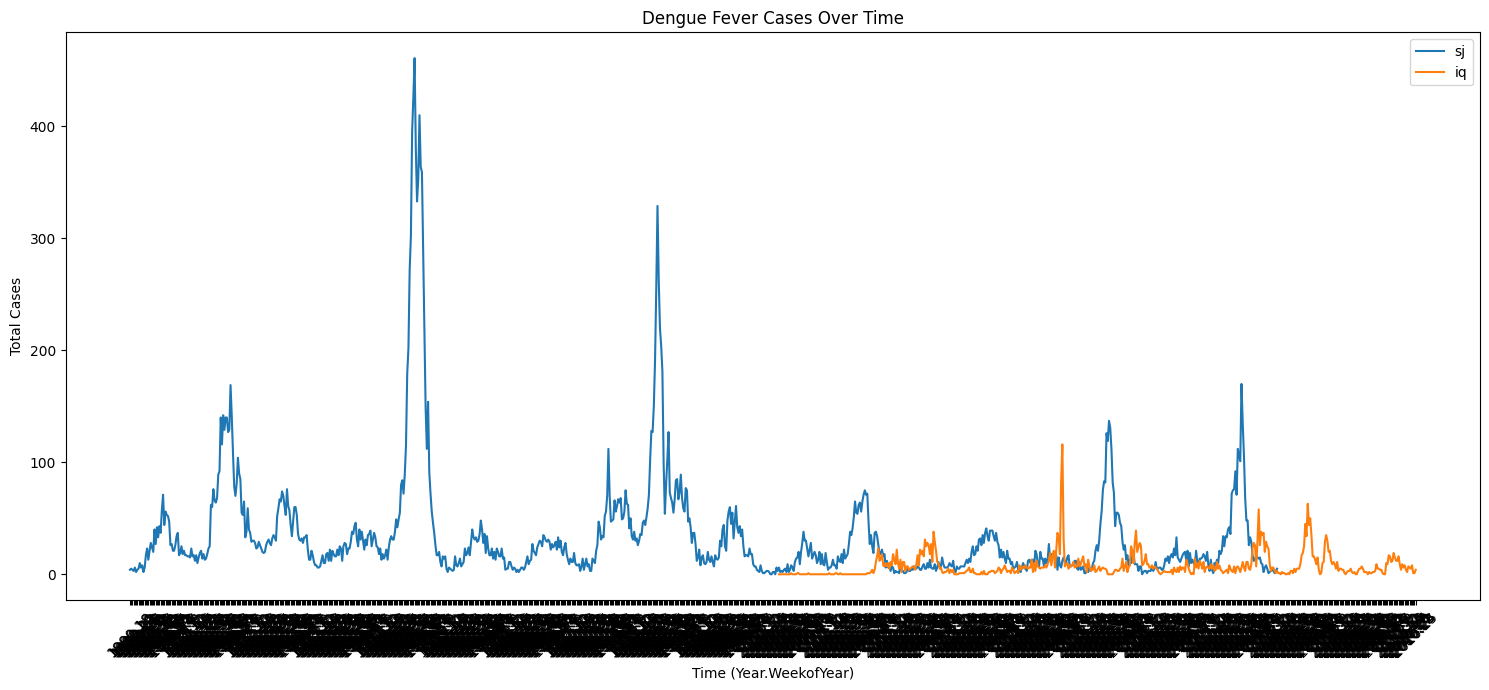

In [15]:
#Time Series Plot
# Create a combined "time" approximation using year and weekofyear for plotting purposes
train_data['approx_date'] = train_data['year'].astype(str) + '.' + train_data['weekofyear'].astype(str)

# Plotting total_cases for each city
plt.figure(figsize=(15, 7))
for city in ['sj', 'iq']:
    city_data = train_data[train_data['city'] == city]
    plt.plot(city_data['approx_date'], city_data['total_cases'], label=city)

plt.title('Dengue Fever Cases Over Time')
plt.xlabel('Time (Year.WeekofYear)')
plt.ylabel('Total Cases')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Seasonality: Both cities show a clear seasonality in dengue cases, with peaks and troughs occurring at regular intervals.

Trend: San Juan (sj) seems to have a more noticeable upward trend in cases in the earlier years, which stabilizes later on. Iquitos (iq), on the other hand, has a relatively consistent number of cases across years, with some occasional spikes.

Differences Between Cities: San Juan generally has a higher number of cases compared to Iquitos. The patterns of dengue cases also differ between the two cities. This shows  the importance of considering city-specific factors when modeling.

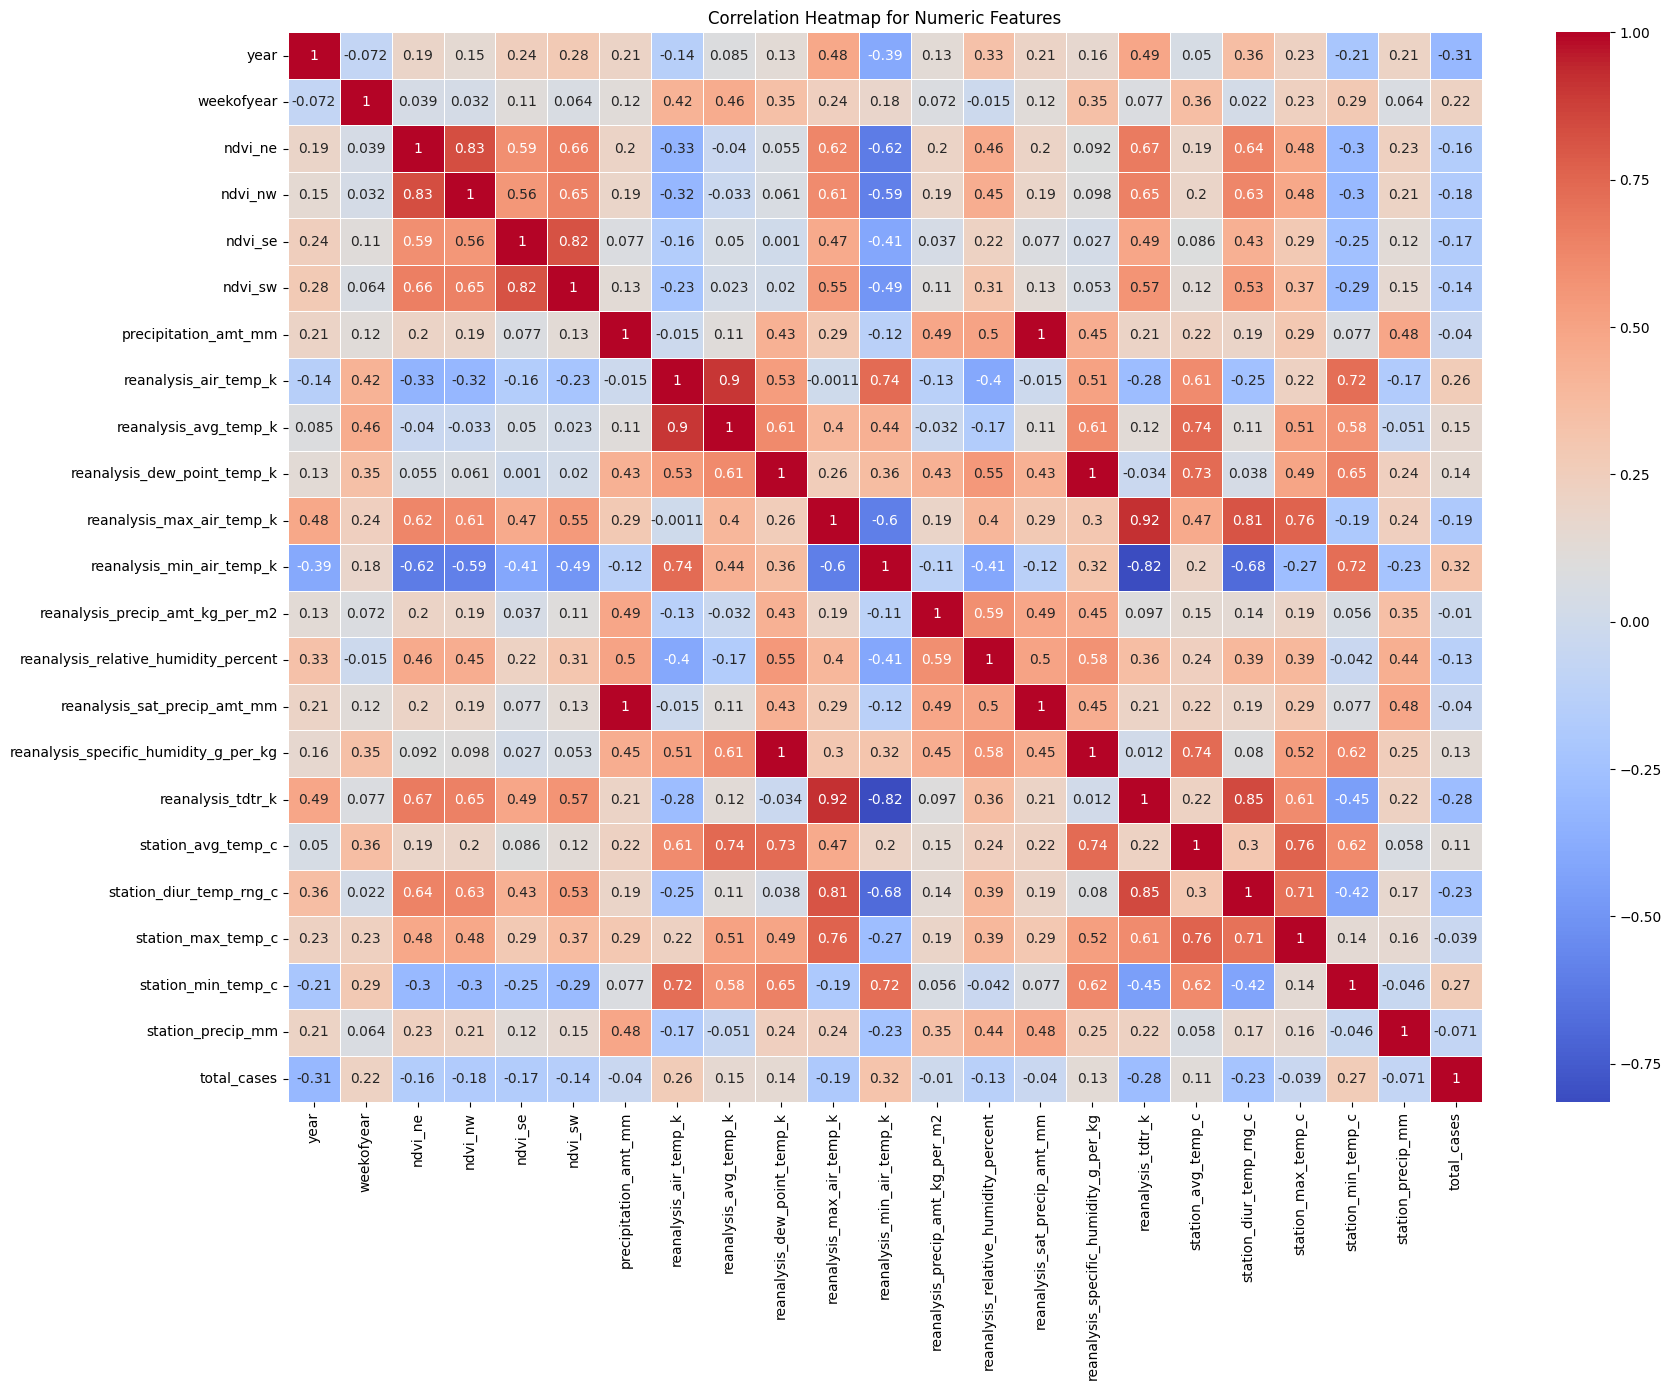

In [16]:
# Correlation Heatmap

# Exclude non-numeric columns and compute the correlation matrix
numeric_data = train_data.select_dtypes(include=['float64', 'int64'])
correlation_matrix_numeric = numeric_data.corr()

# Set up the matplotlib figure
plt.figure(figsize=(18, 14))

# Generate a heatmap for the numeric data
sns.heatmap(correlation_matrix_numeric, annot=True, cmap="coolwarm", linewidths=.5)

# Adjust the layout
plt.title('Correlation Heatmap for Numeric Features')
plt.tight_layout()
plt.show()

Positive Correlations with total_cases:

Some temperature and humidity metrics seem to have a moderate positive correlation with total_cases.


Negative Correlations with total_cases:

While there might be fewer strongly negative correlations in this dataset, it's essential to recognize any feature that might act inversely to dengue cases.

High Inter-feature Correlations:

Some features might be highly correlated with each other, indicating potential multicollinearity. This may impact the interpretability and stability of linear regression coefficients.
For instance, various temperature measurements seem to be correlated with each other. The same goes for some humidity metrics.

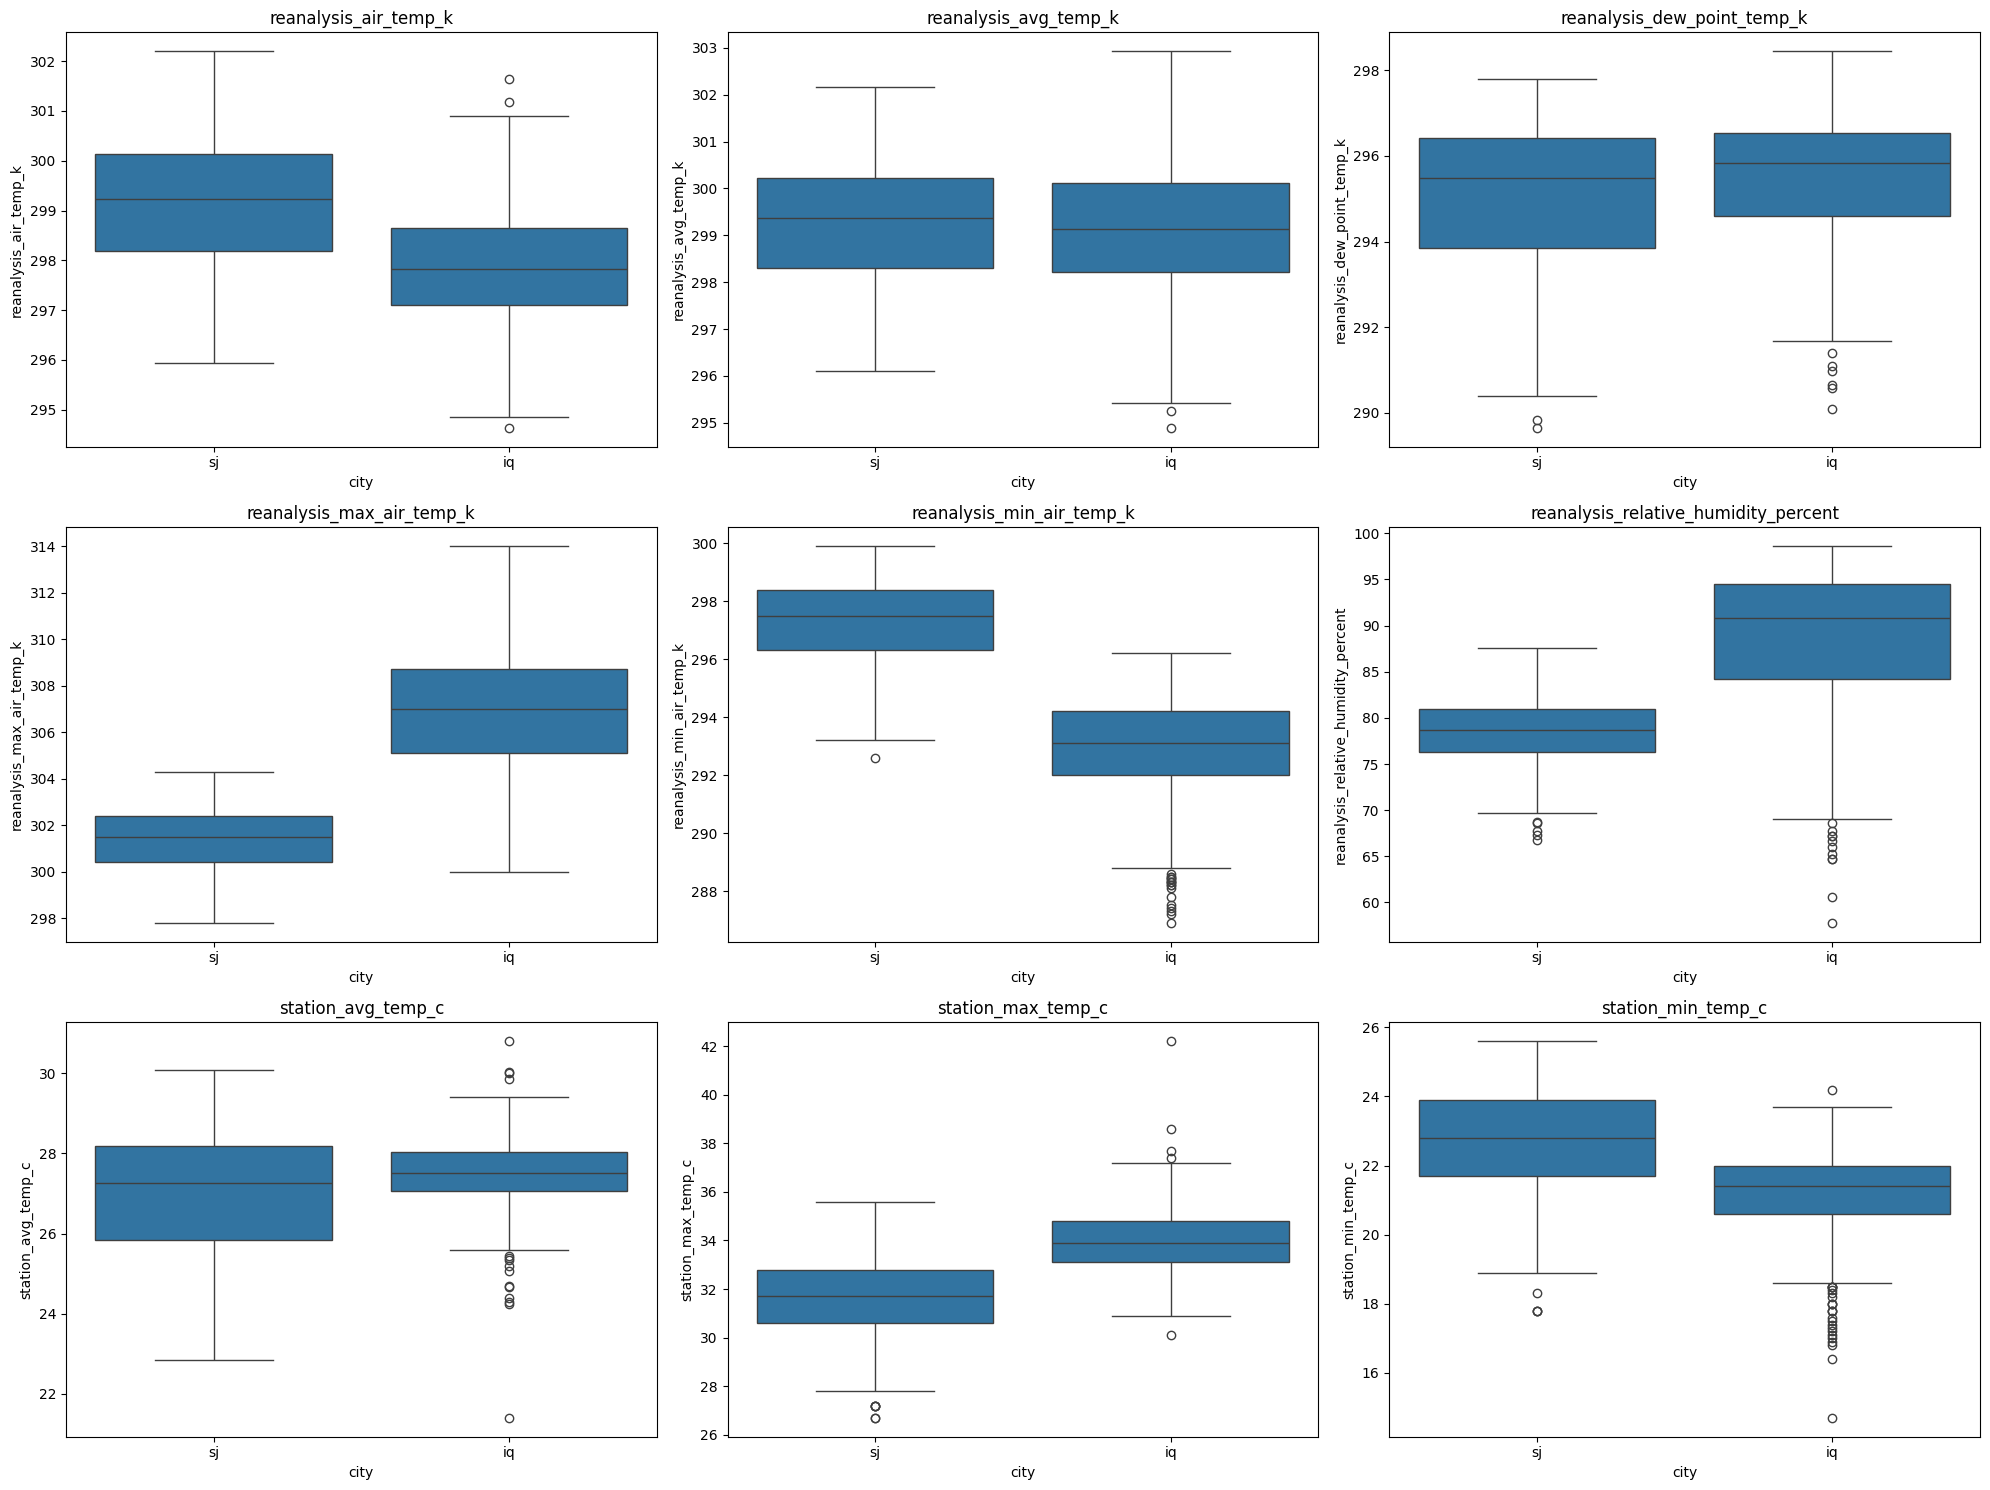

In [17]:
# Features we want to visualize using boxplots
selected_features = ['reanalysis_air_temp_k', 'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k',
                     'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k', 'reanalysis_relative_humidity_percent',
                     'station_avg_temp_c', 'station_max_temp_c', 'station_min_temp_c']

# Plot boxplots for each of the selected features, separated by city
plt.figure(figsize=(20, 15))

for index, feature in enumerate(selected_features, 1):
    plt.subplot(3, 3, index)
    sns.boxplot(data=train_data, x='city', y=feature)
    plt.title(feature)

plt.tight_layout()
plt.show()



The box plots show that there are outliers that have to be dealt with

Feature Differences by City: Some features, like reanalysis_air_temp_k and reanalysis_avg_temp_k, show noticeable differences in their distributions between the two cities. This reinforces the idea that city-specific factors can significantly impact the data and modeling strategies should account for these differences.

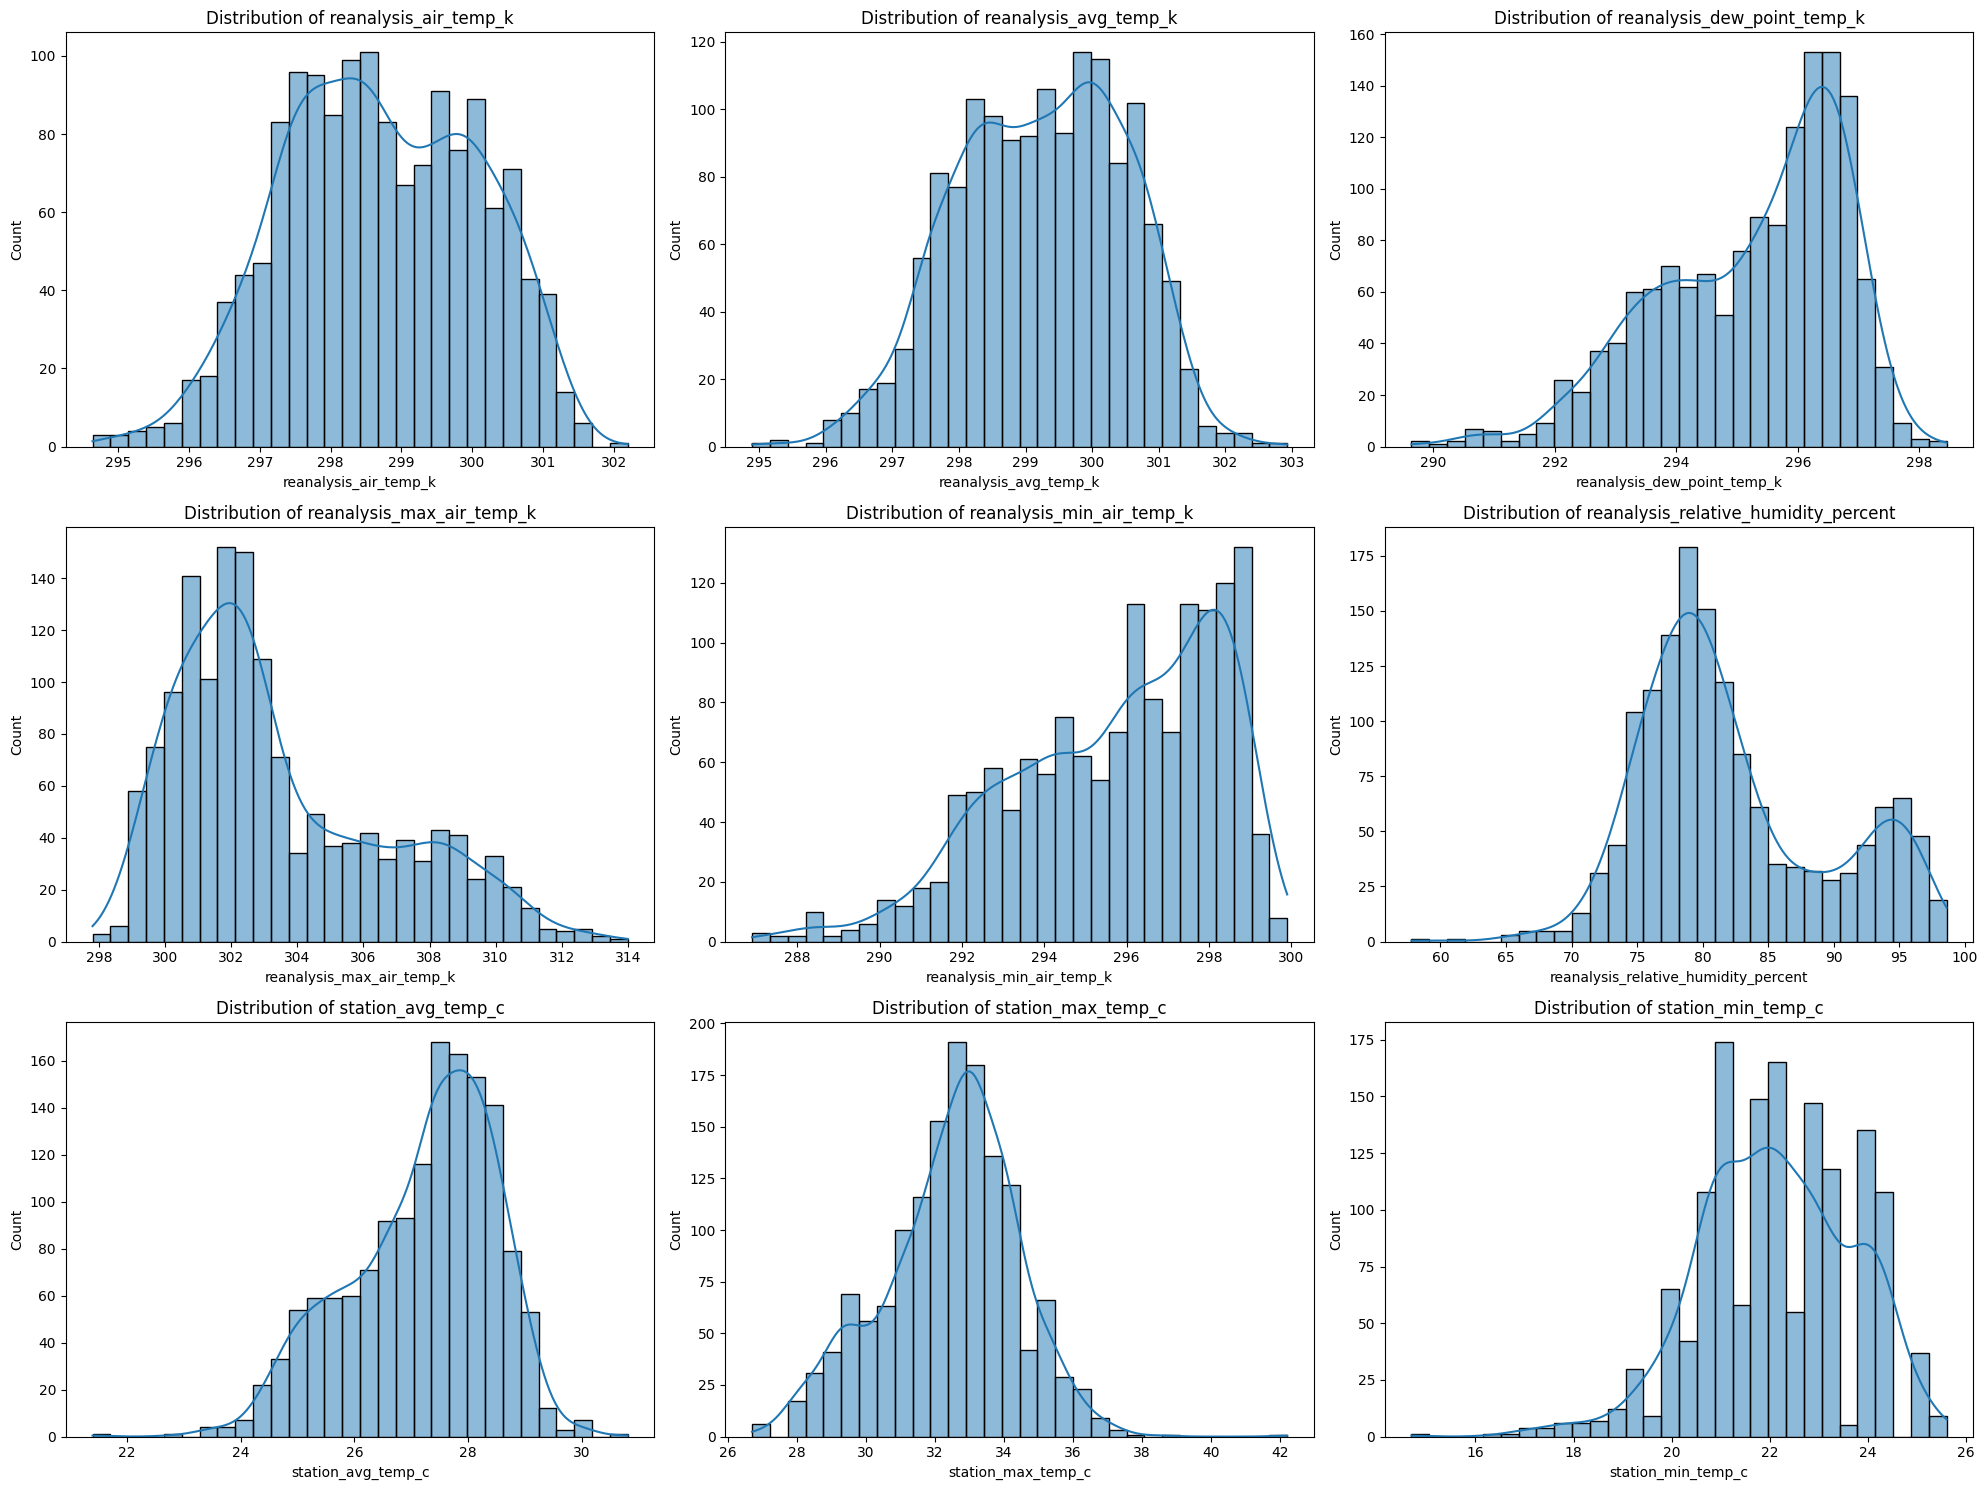

In [18]:
# Plotting histograms for selected features to understand their distributions
plt.figure(figsize=(20, 15))

for index, feature in enumerate(selected_features, 1):
    plt.subplot(3, 3, index)
    sns.histplot(train_data[feature], kde=True, bins=30)
    plt.title(f'Distribution of {feature}')

plt.tight_layout()
plt.show()


Variability: The spread of the data in the histograms provides insights into the variability of each feature.

Peaks: Multiple peaks in a distribution might suggest multiple sub-groups within the data or bimodal distributions.

Skewness: Some distributions show a bit of skewness either to the right (positive skew) or to the left (negative skew). Skewed distributions might sometimes benefit from transformations (like logarithmic or square root transformations) to make them more symmetric, especially for linear models that assume normally distributed errors.

KDE Overlay: The smooth line (Kernel Density Estimation) gives a smoothed version of the histogram and can help in identifying the distribution's mode(s).


**Feature Engineering**

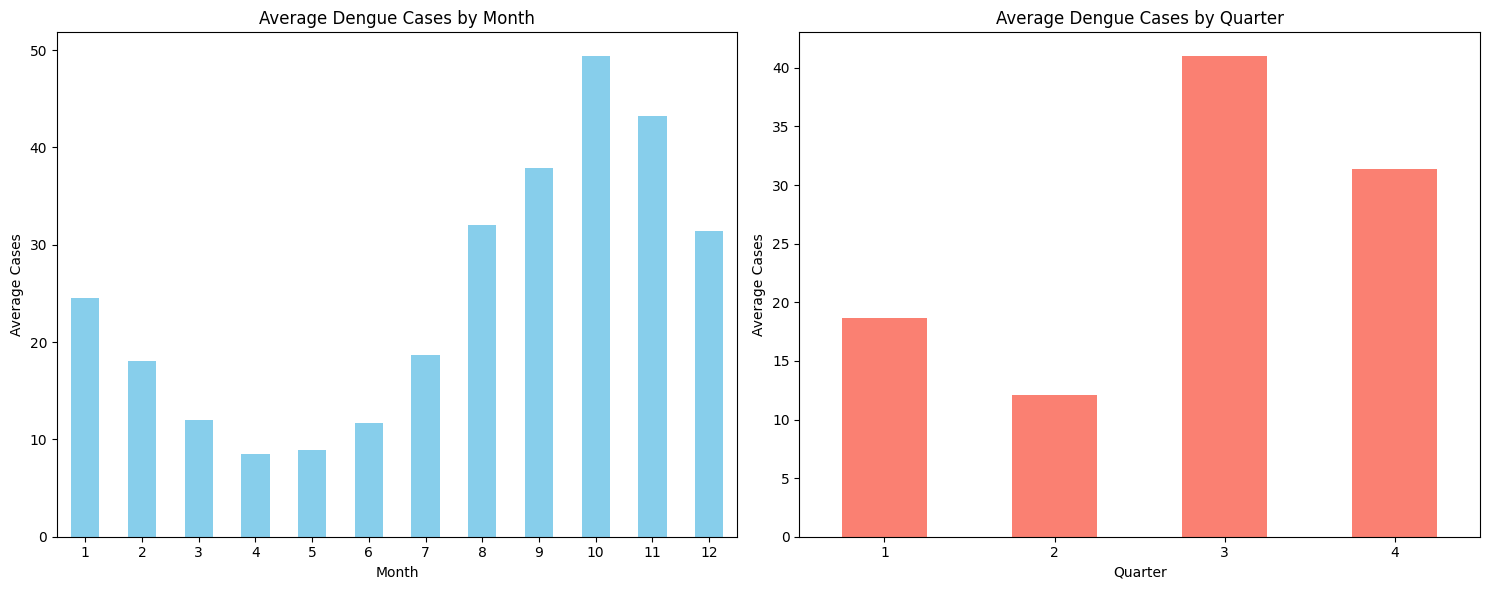

In [19]:
#1.Time-based Features. I'm trying to decide whether to convert the weeks  into months or quarters

# Extracting month from the week_start_date
train_data['month'] = pd.to_datetime(train_data['week_start_date']).dt.month

# Grouping by month and calculating the average number of cases
average_cases_by_month = train_data.groupby('month')['total_cases'].mean()

# Grouping by quarter and calculating the average number of cases
average_cases_by_quarter = train_data.groupby(train_data['month'] // 4 + 1)['total_cases'].mean()

# Plotting
plt.figure(figsize=(15, 6))

# Monthly average cases
plt.subplot(1, 2, 1)
average_cases_by_month.plot(kind='bar', color='skyblue')
plt.title('Average Dengue Cases by Month')
plt.xlabel('Month')
plt.ylabel('Average Cases')
plt.xticks(rotation=0)

# Quarterly average cases
plt.subplot(1, 2, 2)
average_cases_by_quarter.plot(kind='bar', color='salmon')
plt.title('Average Dengue Cases by Quarter')
plt.xlabel('Quarter')
plt.ylabel('Average Cases')
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

Months show finer distinctions. So I shall use months

In [20]:
# Creating the month variables

# Convert month to a categorical variable
train_data['month'] = train_data['month'].astype('category')

# One-hot encode the month column
train_data = pd.get_dummies(train_data, columns=['month'], prefix='month', drop_first=True)

# Display the first few rows to show the one-hot encoded month columns
train_data.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases,approx_date,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,292.414286,299.8,295.9,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4,1990.18,False,False,True,False,False,False,False,False,False,False,False
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,298.442857,293.951429,300.9,296.4,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5,1990.19,False,False,False,True,False,False,False,False,False,False,False
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,298.878571,295.434286,300.5,297.3,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4,1990.20,False,False,False,True,False,False,False,False,False,False,False
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,299.228571,295.310000,301.4,297.0,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3,1990.21,False,False,False,True,False,False,False,False,False,False,False
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,299.664286,295.821429,301.9,297.5,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6,1990.22,False,False,False,True,False,False,False,False,False,False,False


In [21]:

# Creating the month variables
test_features['month'] = pd.to_datetime(test_features['week_start_date']).dt.month
# Convert month to a categorical variable
test_features['month'] = test_features['month'].astype('category')

# One-hot encode the month column
test_features = pd.get_dummies(test_features, columns=['month'], prefix='month', drop_first=True)

# Display the first few rows to show the one-hot encoded month columns
test_features.head()


,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
0,sj,2008,18,2008-04-29,-0.01890,-0.018900,0.102729,0.091200,78.60,298.492857,298.550000,294.527143,301.1,296.4,25.37,78.781429,78.60,15.918571,3.128571,26.528571,7.057143,33.3,21.7,75.2,False,False,True,False,False,False,False,False,False,False,False
1,sj,2008,19,2008-05-06,-0.01800,-0.012400,0.082043,0.072314,12.56,298.475714,298.557143,294.395714,300.8,296.7,21.83,78.230000,12.56,15.791429,2.571429,26.071429,5.557143,30.0,22.2,34.3,False,False,False,True,False,False,False,False,False,False,False
2,sj,2008,20,2008-05-13,-0.00150,-0.016133,0.151083,0.091529,3.66,299.455714,299.357143,295.308571,302.2,296.4,4.12,78.270000,3.66,16.674286,4.428571,27.928571,7.785714,32.8,22.8,3.0,False,False,False,True,False,False,False,False,False,False,False
3,sj,2008,21,2008-05-20,0.02765,-0.019867,0.124329,0.125686,0.00,299.690000,299.728571,294.402857,303.0,296.9,2.20,73.015714,0.00,15.775714,4.342857,28.057143,6.271429,33.3,24.4,0.3,False,False,False,True,False,False,False,False,False,False,False
4,sj,2008,22,2008-05-27,0.05680,0.039833,0.062267,0.075914,0.76,299.780000,299.671429,294.760000,302.3,297.3,4.36,74.084286,0.76,16.137143,3.542857,27.614286,7.085714,33.3,23.3,84.1,False,False,False,True,False,False,False,False,False,False,False


In [22]:
# Creating interaction features
train_data['temp_precip_interaction'] = train_data['reanalysis_avg_temp_k'] * train_data['reanalysis_precip_amt_kg_per_m2']
train_data['temp_range_interaction'] = train_data['reanalysis_min_air_temp_k'] * train_data['reanalysis_max_air_temp_k']
train_data['dew_temp_interaction'] = train_data['reanalysis_dew_point_temp_k'] * train_data['reanalysis_avg_temp_k']

# Displaying the first few rows with the new interaction features
train_data[['reanalysis_avg_temp_k', 'reanalysis_precip_amt_kg_per_m2', 'temp_precip_interaction',
            'reanalysis_min_air_temp_k', 'reanalysis_max_air_temp_k', 'temp_range_interaction',
            'reanalysis_dew_point_temp_k', 'reanalysis_avg_temp_k', 'dew_temp_interaction']].head()


,reanalysis_avg_temp_k,reanalysis_precip_amt_kg_per_m2,temp_precip_interaction,reanalysis_min_air_temp_k,reanalysis_max_air_temp_k,temp_range_interaction,reanalysis_dew_point_temp_k,reanalysis_avg_temp_k,dew_temp_interaction
0,297.742857,32.00,9527.771429,295.9,299.8,88710.82,292.414286,297.742857,87064.264898
1,298.442857,17.94,5354.064857,296.4,300.9,89186.76,293.951429,298.442857,87727.704204
2,298.878571,26.10,7800.730714,297.3,300.5,89338.65,295.434286,298.878571,88298.977265
3,299.228571,13.90,4159.277143,297.0,301.4,89515.80,295.310000,299.228571,88365.189429
4,299.664286,12.20,3655.904286,297.5,301.9,89815.25,295.821429,299.664286,88647.117092


In [23]:
# Creating interaction features
test_features['temp_precip_interaction'] = test_features['reanalysis_avg_temp_k'] * test_features['reanalysis_precip_amt_kg_per_m2']
test_features['temp_range_interaction'] = test_features['reanalysis_min_air_temp_k'] * test_features['reanalysis_max_air_temp_k']
test_features['dew_temp_interaction'] = test_features['reanalysis_dew_point_temp_k'] * test_features['reanalysis_avg_temp_k']

# Displaying the first few rows with the new interaction features
test_features[['reanalysis_avg_temp_k', 'reanalysis_precip_amt_kg_per_m2', 'temp_precip_interaction',
            'reanalysis_min_air_temp_k', 'reanalysis_max_air_temp_k', 'temp_range_interaction',
            'reanalysis_dew_point_temp_k', 'reanalysis_avg_temp_k', 'dew_temp_interaction']].head()


,reanalysis_avg_temp_k,reanalysis_precip_amt_kg_per_m2,temp_precip_interaction,reanalysis_min_air_temp_k,reanalysis_max_air_temp_k,temp_range_interaction,reanalysis_dew_point_temp_k,reanalysis_avg_temp_k,dew_temp_interaction
0,298.550000,25.37,7574.213500,296.4,301.1,89246.04,294.527143,298.550000,87931.078500
1,298.557143,21.83,6517.502429,296.7,300.8,89247.36,294.395714,298.557143,87893.943327
2,299.357143,4.12,1233.351429,296.4,302.2,89572.08,295.308571,299.357143,88402.730204
3,299.728571,2.20,659.402857,296.9,303.0,89960.70,294.402857,299.728571,88240.947796
4,299.671429,4.36,1306.567429,297.3,302.3,89873.79,294.760000,299.671429,88331.150286


In [24]:
temp_humidity_cols.extend(['temp_precip_interaction','temp_range_interaction','dew_temp_interaction'])

# Creating 4-week lags for the temp_humidity_cols in train dataset
for column in temp_humidity_cols:
    train_data[f'{column}_lag4'] = train_data.groupby('city')[column].shift(4)

# Display the first few rows with the new lagged features
train_data[['city', 'year', 'weekofyear'] + [f'{column}_lag4' for column in temp_humidity_cols ]].head()


,city,year,weekofyear,station_avg_temp_c_lag4,reanalysis_air_temp_k_lag4,reanalysis_avg_temp_k_lag4,reanalysis_dew_point_temp_k_lag4,reanalysis_max_air_temp_k_lag4,reanalysis_min_air_temp_k_lag4,reanalysis_relative_humidity_percent_lag4,station_max_temp_c_lag4,station_min_temp_c_lag4,station_diur_temp_rng_c_lag4,reanalysis_tdtr_k_lag4,reanalysis_specific_humidity_g_per_kg_lag4,temp_precip_interaction_lag4,temp_range_interaction_lag4,dew_temp_interaction_lag4
0,sj,1990,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,sj,1990,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,sj,1990,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,sj,1990,21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,sj,1990,22,25.442857,297.572857,297.742857,292.414286,299.8,295.9,73.365714,29.4,20.0,6.9,2.628571,14.012857,9527.771429,88710.82,87064.264898


In [25]:
# Creating 4-week lags for the temp_humidity_cols in the test dataset
for column in temp_humidity_cols:
    test_features[f'{column}_lag4'] = test_features.groupby('city')[column].shift(4)

# Display the first few rows with the new lagged features
test_features[['city', 'year', 'weekofyear'] + [f'{column}_lag4' for column in temp_humidity_cols]].head(10)

,city,year,weekofyear,station_avg_temp_c_lag4,reanalysis_air_temp_k_lag4,reanalysis_avg_temp_k_lag4,reanalysis_dew_point_temp_k_lag4,reanalysis_max_air_temp_k_lag4,reanalysis_min_air_temp_k_lag4,reanalysis_relative_humidity_percent_lag4,station_max_temp_c_lag4,station_min_temp_c_lag4,station_diur_temp_rng_c_lag4,reanalysis_tdtr_k_lag4,reanalysis_specific_humidity_g_per_kg_lag4,temp_precip_interaction_lag4,temp_range_interaction_lag4,dew_temp_interaction_lag4
0,sj,2008,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,sj,2008,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,sj,2008,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,sj,2008,21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,sj,2008,22,26.528571,298.492857,298.550000,294.527143,301.1,296.4,78.781429,33.3,21.7,7.057143,3.128571,15.918571,7574.213500,89246.04,87931.078500
5,sj,2008,23,26.071429,298.475714,298.557143,294.395714,300.8,296.7,78.230000,30.0,22.2,5.557143,2.571429,15.791429,6517.502429,89247.36,87893.943327
6,sj,2008,24,27.928571,299.455714,299.357143,295.308571,302.2,296.4,78.270000,32.8,22.8,7.785714,4.428571,16.674286,1233.351429,89572.08,88402.730204
7,sj,2008,25,28.057143,299.690000,299.728571,294.402857,303.0,296.9,73.015714,33.3,24.4,6.271429,4.342857,15.775714,659.402857,89960.70,88240.947796
8,sj,2008,26,27.614286,299.780000,299.671429,294.760000,302.3,297.3,74.084286,33.3,23.3,7.085714,3.542857,16.137143,1306.567429,89873.79,88331.150286
9,sj,2008,27,28.000000,299.768571,299.728571,295.314286,301.9,297.6,76.557143,32.8,25.0,5.171429,2.857143,16.667143,6758.879286,89845.44,88514.128980


In [26]:
# Function to handle outliers using the IQR method
def handle_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Capping the outliers
    data[column] = data[column].apply(lambda x: upper_bound if x > upper_bound else (lower_bound if x < lower_bound else x))
    
    return data

# Handling outliers for the selected features
for feature in selected_features:
    train_data = handle_outliers_iqr(train_data, feature)

# Displaying the cleaned data
train_data[selected_features].describe()


,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_relative_humidity_percent,station_avg_temp_c,station_max_temp_c,station_min_temp_c
count,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000
mean,298.701472,299.226403,295.251116,303.416003,295.724725,82.155760,27.195279,32.454327,22.109890
std,1.357737,1.256127,1.516204,3.212821,2.549587,7.111739,1.264394,1.933203,1.544261
min,294.635714,295.350000,290.641786,297.800000,287.900000,64.003929,23.628571,26.900000,17.800000
25%,297.665000,298.264286,294.130357,301.000000,293.900000,77.226429,26.328571,31.100000,21.100000
50%,298.646429,299.289286,295.640714,302.400000,296.200000,80.301429,27.414286,32.800000,22.200000
75%,299.827500,300.207143,296.456071,305.500000,297.900000,86.041429,28.128571,33.900000,23.300000
max,302.200000,302.928571,298.450000,312.250000,299.900000,98.610000,30.800000,38.100000,25.600000


In [27]:
# Function to handle outliers using the IQR method
def handle_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Capping the outliers
    data[column] = data[column].apply(lambda x: upper_bound if x > upper_bound else (lower_bound if x < lower_bound else x))
    
    return data

# Handling outliers for the selected features
for feature in selected_features:
   test_features = handle_outliers_iqr(test_features, feature)

# Displaying the cleaned data
test_features[selected_features].describe()

,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_relative_humidity_percent,station_avg_temp_c,station_max_temp_c,station_min_temp_c
count,416.000000,416.000000,416.000000,416.000000,416.000000,416.000000,416.000000,416.000000,416.000000
mean,298.816992,299.352953,295.421437,303.614874,295.746665,82.489378,27.372868,32.535817,22.380889
std,1.466076,1.303083,1.518762,3.081380,2.752962,7.361976,1.214806,1.911447,1.656223
min,294.554286,295.235714,290.911786,298.200000,286.412500,64.920000,24.157143,27.200000,18.050000
25%,297.751429,298.326786,294.350000,301.475000,293.500000,77.400000,26.528571,31.100000,21.200000
50%,298.547143,299.328571,295.825000,302.750000,296.300000,80.330000,27.483333,32.800000,22.200000
75%,300.238214,300.521429,296.642143,305.800000,298.225000,87.978214,28.278571,33.900000,23.300000
max,301.935714,303.328571,297.794286,312.287500,299.700000,97.982857,30.271429,38.100000,26.450000


**Feature Selection**

In [28]:
# Filter the dataset to exclude non-numerical columns
numerical_data = train_data.select_dtypes(exclude=['object'])

# Calculate the correlation of each numerical feature with the target variable 'total_cases'
numerical_correlations = numerical_data.corr()['total_cases'].sort_values(ascending=False)

# Display the correlations
numerical_correlations


total_cases                                   1.000000
reanalysis_min_air_temp_k_lag4                0.356318
station_min_temp_c_lag4                       0.351247
reanalysis_air_temp_k_lag4                    0.325999
reanalysis_min_air_temp_k                     0.325369
station_min_temp_c                            0.267798
reanalysis_air_temp_k                         0.264546
dew_temp_interaction_lag4                     0.228109
weekofyear                                    0.216452
reanalysis_avg_temp_k_lag4                    0.216028
station_avg_temp_c_lag4                       0.208526
reanalysis_dew_point_temp_k_lag4              0.195806
reanalysis_specific_humidity_g_per_kg_lag4    0.180360
month_10                                      0.179541
dew_temp_interaction                          0.163115
reanalysis_avg_temp_k                         0.151453
temp_range_interaction_lag4                   0.150901
reanalysis_dew_point_temp_k                   0.142571
reanalysis

In [29]:
# Selecting features with an absolute correlation value greater than 0.1
selected_features = numerical_correlations[abs(numerical_correlations) > 0.1].index.tolist()

# Excluding the target variable 'total_cases' from the selected features list
selected_features.remove('total_cases')

# Displaying the selected features
selected_features


['reanalysis_min_air_temp_k_lag4',
 'station_min_temp_c_lag4',
 'reanalysis_air_temp_k_lag4',
 'reanalysis_min_air_temp_k',
 'station_min_temp_c',
 'reanalysis_air_temp_k',
 'dew_temp_interaction_lag4',
 'weekofyear',
 'reanalysis_avg_temp_k_lag4',
 'station_avg_temp_c_lag4',
 'reanalysis_dew_point_temp_k_lag4',
 'reanalysis_specific_humidity_g_per_kg_lag4',
 'month_10',
 'dew_temp_interaction',
 'reanalysis_avg_temp_k',
 'temp_range_interaction_lag4',
 'reanalysis_dew_point_temp_k',
 'reanalysis_specific_humidity_g_per_kg',
 'month_11',
 'station_avg_temp_c',
 'month_5',
 'month_4',
 'reanalysis_relative_humidity_percent_lag4',
 'reanalysis_relative_humidity_percent',
 'ndvi_sw',
 'ndvi_ne',
 'reanalysis_max_air_temp_k_lag4',
 'ndvi_se',
 'ndvi_nw',
 'reanalysis_max_air_temp_k',
 'station_diur_temp_rng_c',
 'station_diur_temp_rng_c_lag4',
 'reanalysis_tdtr_k_lag4',
 'reanalysis_tdtr_k',
 'year']

Feature selection by Random Forest

In [30]:
# Count the rows with NaN values in the lagged columns
nan_values = train_data.isnull().sum()

nan_values

city                                          0
year                                          0
weekofyear                                    0
week_start_date                               0
ndvi_ne                                       0
ndvi_nw                                       0
ndvi_se                                       0
ndvi_sw                                       0
precipitation_amt_mm                          0
reanalysis_air_temp_k                         0
reanalysis_avg_temp_k                         0
reanalysis_dew_point_temp_k                   0
reanalysis_max_air_temp_k                     0
reanalysis_min_air_temp_k                     0
reanalysis_precip_amt_kg_per_m2               0
reanalysis_relative_humidity_percent          0
reanalysis_sat_precip_amt_mm                  0
reanalysis_specific_humidity_g_per_kg         0
reanalysis_tdtr_k                             0
station_avg_temp_c                            0
station_diur_temp_rng_c                 

In [31]:
train_data = train_data.dropna()

In [32]:
train_data.shape, test_features.shape

((1448, 55), (416, 53))

In [33]:
# Adjusting the columns list to drop and then proceeding
columns_to_drop = ['city', 'year', 'weekofyear', 'week_start_date', 'total_cases']

X = train_data.drop(columns_to_drop, axis=1)
y = train_data['total_cases']

# Initializing the random forest regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
# Training the random forest regressor
rf.fit(X, y)

# Extracting feature importances and creating a DataFrame for visualization
feature_importances = pd.DataFrame({
    'feature': X.columns,
    'importance': rf.feature_importances_
})

# Sorting the DataFrame by importance
feature_importances = feature_importances.sort_values(by='importance', ascending=False)

# Displaying the top 20 features
top_features = feature_importances.head(25)

top_features


,feature,importance
20,approx_date,0.323171
40,reanalysis_min_air_temp_k_lag4,0.107569
43,station_min_temp_c_lag4,0.045401
3,ndvi_sw,0.037328
17,station_max_temp_c,0.031368
7,reanalysis_dew_point_temp_k,0.027328
38,reanalysis_dew_point_temp_k_lag4,0.025720
41,reanalysis_relative_humidity_percent_lag4,0.024541
13,reanalysis_specific_humidity_g_per_kg,0.022084
42,station_max_temp_c_lag4,0.020522


In [34]:
#Take the intersection of the top features from both the correlation method and the Random Forest feature importance.
top_features_list = top_features['feature'].tolist()

common_features = [feature for feature in selected_features if feature in top_features_list]
common_features


['reanalysis_min_air_temp_k_lag4',
 'station_min_temp_c_lag4',
 'reanalysis_air_temp_k_lag4',
 'reanalysis_air_temp_k',
 'dew_temp_interaction_lag4',
 'reanalysis_avg_temp_k_lag4',
 'reanalysis_dew_point_temp_k_lag4',
 'reanalysis_specific_humidity_g_per_kg_lag4',
 'dew_temp_interaction',
 'temp_range_interaction_lag4',
 'reanalysis_dew_point_temp_k',
 'reanalysis_specific_humidity_g_per_kg',
 'station_avg_temp_c',
 'reanalysis_relative_humidity_percent_lag4',
 'reanalysis_relative_humidity_percent',
 'ndvi_sw',
 'ndvi_ne',
 'reanalysis_max_air_temp_k_lag4',
 'ndvi_se',
 'ndvi_nw',
 'reanalysis_tdtr_k']

In [35]:
#Selecting the top features for both the train_data and test_features

train_data = train_data[common_features + ['total_cases', 'city', 'year', 'weekofyear']]
test_features = test_features[common_features + ['city', 'year', 'weekofyear']]

print(train_data.shape, test_features.shape)



(1448, 25) (416, 24)


**Split the data into training and validation sets**

In [36]:
from sklearn.model_selection import train_test_split


# Create the validation sets
X = train_data.drop(columns=['total_cases'])
y = train_data['total_cases']


# Splitting data into training and validation sets (80% train, 20% validation)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)




In [37]:
# One-hot encoding the 'city' variable for both training and validation sets
X_train = pd.get_dummies(X_train, columns=['city'], drop_first=True)
X_val = pd.get_dummies(X_val, columns=['city'], drop_first=True)

X_train.head()
print(X_train.columns)

Index(['reanalysis_min_air_temp_k_lag4', 'station_min_temp_c_lag4',
       'reanalysis_air_temp_k_lag4', 'reanalysis_air_temp_k',
       'dew_temp_interaction_lag4', 'reanalysis_avg_temp_k_lag4',
       'reanalysis_dew_point_temp_k_lag4',
       'reanalysis_specific_humidity_g_per_kg_lag4', 'dew_temp_interaction',
       'temp_range_interaction_lag4', 'reanalysis_dew_point_temp_k',
       'reanalysis_specific_humidity_g_per_kg', 'station_avg_temp_c',
       'reanalysis_relative_humidity_percent_lag4',
       'reanalysis_relative_humidity_percent', 'ndvi_sw', 'ndvi_ne',
       'reanalysis_max_air_temp_k_lag4', 'ndvi_se', 'ndvi_nw',
       'reanalysis_tdtr_k', 'year', 'weekofyear', 'city_sj'],
      dtype='object')


**Feature Scaling**

In [38]:
from sklearn.preprocessing import RobustScaler

# Initialize the RobustScaler
robust_scaler = RobustScaler()

# Fit and transform the training data using the robust scaler
X_train_scaled = robust_scaler.fit_transform(X_train)

# Transform the validation data using the robust scaler
X_val_scaled = robust_scaler.transform(X_val)

X_train_scaled[:5]  # Display the first 5 rows of the scaled training data

array([[ 3.92638037e-01,  2.72727273e-01,  4.00000000e-01,
         8.72273106e-01,  1.45940464e-01,  1.28794848e-01,
         1.18772783e-01,  8.64179325e-02,  7.00452965e-01,
         1.58197405e-04,  6.27242940e-01,  6.31515878e-01,
         5.32538500e-01,  6.04395604e-02,  1.53385261e-01,
        -1.99660500e-01, -9.54626818e-01, -2.24719101e-01,
        -3.51698288e-01, -5.88977008e-01, -8.28729282e-02,
        -3.75000000e-01,  1.85185185e-01,  0.00000000e+00],
       [-4.17177914e-01, -3.63636364e-01,  4.66832093e-01,
         2.62781016e-01,  8.28006806e-01,  8.57405704e-01,
         6.16342649e-01,  7.31160596e-01,  1.20004712e+00,
         1.11393634e+00,  1.24013107e+00,  1.43019772e+00,
         1.43864878e+00,  9.55959425e-01,  1.76968244e+00,
         1.47070895e+00,  9.27242081e-01,  1.52808989e+00,
         9.26867857e-01,  8.41971391e-01,  1.15469613e+00,
         1.00000000e+00, -5.55555556e-01, -1.00000000e+00],
       [ 4.90797546e-01,  1.00000000e+00,  5.19106700e

**Feature Modeling**

In [39]:
#1. Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

# Initialize the linear regression model
lin_reg = LinearRegression()

# Train the model using the scaled training data
lin_reg.fit(X_train_scaled, y_train)

# Predict on the validation set
y_val_pred = lin_reg.predict(X_val_scaled)

# Calculate the mean absolute error
mae_linear_regression = mean_absolute_error(y_val, y_val_pred)
mae_linear_regression

20.586495168154727

In [40]:
#2. Ridge Regression
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error

# Initialize Ridge Regression model
ridge_model = Ridge(alpha=1.0)  # You can adjust the alpha parameter for regularization strength

# Train the model
ridge_model.fit(X_train_scaled, y_train)

# Predict on the validation set
y_pred_ridge = ridge_model.predict(X_val_scaled)

# Calculate the mean absolute error
mae_ridge = mean_absolute_error(y_val, y_pred_ridge)
print(f"Mean Absolute Error (Ridge Regression): {mae_ridge}")

Mean Absolute Error (Ridge Regression): 20.52424853049553


In [41]:
#3. Decision Tree:
from sklearn.tree import DecisionTreeRegressor

# Initialize the Decision Tree model
tree_model = DecisionTreeRegressor(max_depth=10)  # Adjust max_depth for tree depth

# Train the model
tree_model.fit(X_train_scaled, y_train)

# Predict on the validation set
y_pred_tree = tree_model.predict(X_val_scaled)

# Calculate the mean absolute error
mae_tree = mean_absolute_error(y_val, y_pred_tree)
print(f"Mean Absolute Error (Decision Trees): {mae_tree}")

Mean Absolute Error (Decision Trees): 13.258463124646763


In [42]:
#4. Random Forest

from sklearn.ensemble import RandomForestRegressor

# Initialize the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train_scaled, y_train)

# Predict on the validation set
y_pred_rf = rf_model.predict(X_val_scaled)

# Calculate the mean absolute error
mae_rf = mean_absolute_error(y_val, y_pred_rf)
print(f"Mean Absolute Error (Random Forest): {mae_rf}")


Mean Absolute Error (Random Forest): 13.272379310344826


In [43]:
#Hyper parameter Optimization for Gradient Boosting Regressor

gb = GradientBoostingRegressor(random_state=42)

# Define hyperparameters and their possible values
param_grid_gb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 0.9, 1.0],
    'max_features': ['sqrt', 'log2', None]
}

# Use TimeSeriesSplit for cross-validation
tscv = TimeSeriesSplit(n_splits=5)

# Set up GridSearchCV for Gradient Boosting
grid_search_gb = GridSearchCV(gb, param_grid_gb, cv=tscv, scoring='neg_mean_absolute_error', n_jobs=-1, verbose=1)

# Fit to the data
grid_search_gb.fit(X_train_scaled, y_train)

# Extract the best hyperparameters
best_params_gb = grid_search_gb.best_params_

Fitting 5 folds for each of 243 candidates, totalling 1215 fits


In [44]:
# Use the best hyperparameters from the grid search for Gradient Boosting
best_gb_params = grid_search_gb.best_params_

# Initialize the Gradient Boosting model with the best hyperparameters
gb_model = GradientBoostingRegressor(**best_gb_params, random_state=42)

# Train the model
gb_model.fit(X_train_scaled, y_train)

# Predict on the validation set
y_pred_gb = gb_model.predict(X_val_scaled)

# Calculate the mean absolute error
mae_gb = mean_absolute_error(y_val, y_pred_gb)
print(f"Mean Absolute Error (Gradient Boosting): {mae_gb}")



Mean Absolute Error (Gradient Boosting): 11.215230473552625


In [45]:
 #Hyper parameter Optimizationfor XGBoost

xgb_regressor = xgb.XGBRegressor(random_state=42)

# Define hyperparameters and their possible values
param_grid_xgb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.05, 0.1],
    'gamma': [0, 0.1, 0.2],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9],
    'max_depth': [5, 6, 7]
}

# Set up GridSearchCV for XGBoost
grid_search_xgb = GridSearchCV(xgb_regressor, param_grid_xgb, cv=tscv, scoring='neg_mean_absolute_error', n_jobs=-1, verbose=1)

# Fit to the data
grid_search_xgb.fit(X_train_scaled, y_train)

# Extract the best hyperparameters
best_params_xgb = grid_search_xgb.best_params_


Fitting 5 folds for each of 729 candidates, totalling 3645 fits


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if i

In [46]:

# Using the best hyperparameters from the grid search for XGBoost
best_xgb_params = grid_search_xgb.best_params_

# Initialize the XGBRegressor with the best hyperparameters
xgb_regressor = xgb.XGBRegressor(**best_xgb_params, random_state=42)

# Train the model
xgb_regressor.fit(X_train_scaled, y_train)

# Predict on the validation set
y_pred_xgb = xgb_regressor.predict(X_val_scaled)

# Calculate the mean absolute error for XGBoost
mae_xgb = mean_absolute_error(y_val, y_pred_xgb)
print(f"Mean Absolute Error (XGBoost): {mae_xgb}")



Mean Absolute Error (XGBoost): 11.191794257122895


We will use a **Stacked Model of Xgboost and Gradient Boosting** as they both have the **lowest MAE**

**Feature Engineering the Test Data and creating Predictions**

In [47]:

# Handling NaN values in the test features
nan_columns = test_features.columns[test_features.isnull().any()]
for col in nan_columns:
    median_value = train_data[col].median()  # Using median from training data to avoid data leakage
    test_features[col].fillna(median_value, inplace=True)

# One-hot encode city column and dropping total_cases 
test_features = pd.get_dummies(test_features, columns=['city'], drop_first=True) 
test_features = test_features.drop('total_cases', axis=1, errors='ignore') 

# Scaling test features
test_scaled = robust_scaler.transform(test_features)

# Predicting on the validation set using Gradient Boosting and XGBoost
y_pred_gb = gb_model.predict(X_val_scaled)
y_pred_xgb = xgb_regressor.predict(X_val_scaled)

# Stacking the predictions from the base models to form a new training set for the meta-model
stacked_predictions = np.column_stack((y_pred_gb, y_pred_xgb))

# Initializing and training the meta-model
meta_model = LinearRegression()
meta_model.fit(stacked_predictions, y_val)

# Predicting using individual models on the test set
gb_test_preds = gb_model.predict(test_scaled)
xgb_test_preds = xgb_regressor.predict(test_scaled)

# Stacking the test set predictions
stacked_test_predictions = np.column_stack((gb_test_preds, xgb_test_preds))

# Use the meta-model to make final predictions on the test set
final_predictions = meta_model.predict(stacked_test_predictions)
final_predictions = final_predictions.round().astype(int)


In [48]:

test_features['city'] = np.where(test_features['city_sj'] == 1, 'sj', 'iq')

submission = pd.DataFrame({
        "city": test_features.city,
        "year": test_features.year,
    "weekofyear":test_features.weekofyear,
    "total_cases":final_predictions
    })
submission
submission.to_csv('submission_stacked.csv', index=False)